In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("C:/Users/User/Desktop/cdac advance modules/pml lecture/class  practice/program_dataset/BreastCancer.csv")

In [7]:
df.head(5)

,Code,Clump,UniCell_Size,Uni_CellShape,MargAdh,SEpith,BareN,BChromatin,NoemN,Mitoses,Class
0,61634,5,4,3,1,2,2,2,3,1,Benign
1,63375,9,1,2,6,4,10,7,7,2,Malignant
2,76389,10,4,7,2,2,8,6,1,1,Malignant
3,95719,6,10,10,10,8,10,7,10,7,Malignant
4,128059,1,1,1,1,2,5,5,1,1,Benign


In [4]:
df['Class'].unique()

array(['Benign', 'Malignant'], dtype=object)

In [5]:
dum_df = pd.get_dummies(df,drop_first=True)

In [20]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

X = dum_df.iloc[:,:-1]
y = dum_df.iloc[:,-1]

y.value_counts()
pd.crosstab(index=y,columns='Prop',normalize='all')

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, 
                                                    random_state=2021,
                                                    stratify=y)


knn = KNeighborsClassifier(n_neighbors=11)

knn.fit( X_train , y_train )
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[123  15]
 [ 60  12]]
              precision    recall  f1-score   support

           0       0.67      0.89      0.77       138
           1       0.44      0.17      0.24        72

    accuracy                           0.64       210
   macro avg       0.56      0.53      0.50       210
weighted avg       0.59      0.64      0.59       210

0.6428571428571429


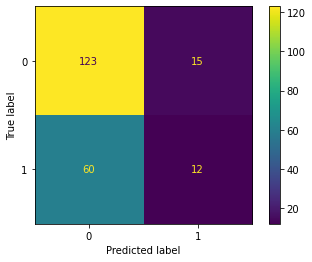

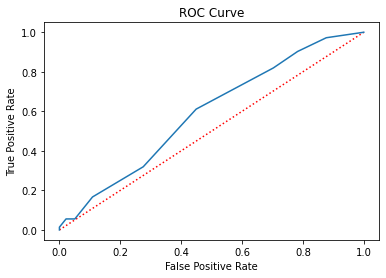

0.5900764895330114

In [21]:

########## Supported from version 0.22 onwards ##########
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn,X_test,y_test,labels=[0,1])
plt.show()


#########################################################
from sklearn.metrics import roc_curve, roc_auc_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = knn.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

############ Plot ROC curve #############
import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1], 'r:')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
#########################################
roc_auc_score(y_test, y_pred_prob)

auc
1:-
0.5579710144927537

3:-
0.5517814009661836

5:-
0.5864029790660226

7:-
0.5872081320450885

9:-
0.5932467793880837

11:-
0.5900764895330114